<a href="https://colab.research.google.com/github/kimdonggyu2008/SKT_FLY_AI_6/blob/main/16_mm_multi_pollution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
import seaborn as sns

In [2]:
!wget https://raw.githubusercontent.com/devdio/datasets/fc39a66ca32ae0f6199fd96b4d9aa61b832ea735/pollution_dataset.csv

--2025-01-02 08:34:55--  https://raw.githubusercontent.com/devdio/datasets/fc39a66ca32ae0f6199fd96b4d9aa61b832ea735/pollution_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 242391 (237K) [text/plain]
Saving to: ‘pollution_dataset.csv’

pollution_dataset.c 100%[===================>] 236.71K  --.-KB/s    in 0.02s   

2025-01-02 08:34:55 (9.75 MB/s) - ‘pollution_dataset.csv’ saved [242391/242391]



In [4]:
df=pd.read_csv('pollution_dataset.csv')

In [5]:
df.columns=[col.replace(' ','_') for col in df.columns]

In [6]:
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air_Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [7]:
df.isna().sum()

,0
Temperature,0
Humidity,0
PM2.5,0
PM10,0
NO2,0
SO2,0
CO,0
Proximity_to_Industrial_Areas,0
Population_Density,0
Air_Quality,0


In [9]:
x=df.drop('Air_Quality',axis=1)
y=df['Air_Quality']

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [11]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4000, 9), (1000, 9), (4000,), (1000,))

In [13]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(x_train)
x_train_s=ss.transform(x_train)
x_test_s=ss.transform(x_test)

In [14]:
x_train.shape,x_test.shape

((4000, 9), (1000, 9))

In [40]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
le.fit(y_train)
y_train_e=le.transform(y_train)
y_test_e=le.transform(y_test)

In [16]:
le.classes_

array(['Good', 'Hazardous', 'Moderate', 'Poor'], dtype=object)

In [17]:
from keras.utils import to_categorical
y_train_e=to_categorical(y_train_e)


In [18]:
type(x_train_s),type(y_train_e)

(numpy.ndarray, numpy.ndarray)

In [20]:
from keras import layers

model=keras.Sequential([
    layers.Input(shape=(x_train_s.shape[1],)),
    layers.Dense(units=24,activation='relu'),
    layers.Dense(units=12,activation='relu'),
    layers.Dense(units=4,activation='softmax')
])

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 24)                  │             240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 12)                  │             300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              52 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 592 (2.31 KB)

 Trainable params: 592 (2.31 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [25]:
batch_size=64
epochs=300

hist=model.fit(x_train_s,
               y_train_e,
               epochs=epochs,
               validation_split=0.2,
               batch_size=batch_size)

Epoch 1/300
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.3318 - loss: 1.4326 - val_accuracy: 0.5900 - val_loss: 1.1376
Epoch 2/300
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6305 - loss: 1.0340 - val_accuracy: 0.6800 - val_loss: 0.8244
Epoch 3/300
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7130 - loss: 0.7803 - val_accuracy: 0.7412 - val_loss: 0.6684
Epoch 4/300
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7603 - loss: 0.6194 - val_accuracy: 0.7962 - val_loss: 0.5588
Epoch 5/300
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8074 - loss: 0.5288 - val_accuracy: 0.8425 - val_loss: 0.4655
Epoch 6/300
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8536 - loss: 0.4438 - val_accuracy: 0.8700 - val_loss: 0.3876
Epoch 7/300
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8738 - loss: 0.3669 - val_accuracy: 0.8913 - val_loss: 0.3314
Epoch 8/300
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8956 - loss: 0.3149 - val_accuracy: 0.9075 - 

In [26]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16,8))
    plt.subplot(1, 2, 1)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'], label='train_loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='val_loss')
    plt.title('Loss Curve')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='train_acc')
    plt.plot(hist['epoch'], hist['val_accuracy'], label='val_acc')
    plt.title('Accuracy Curve')
    plt.legend()
    plt.show()


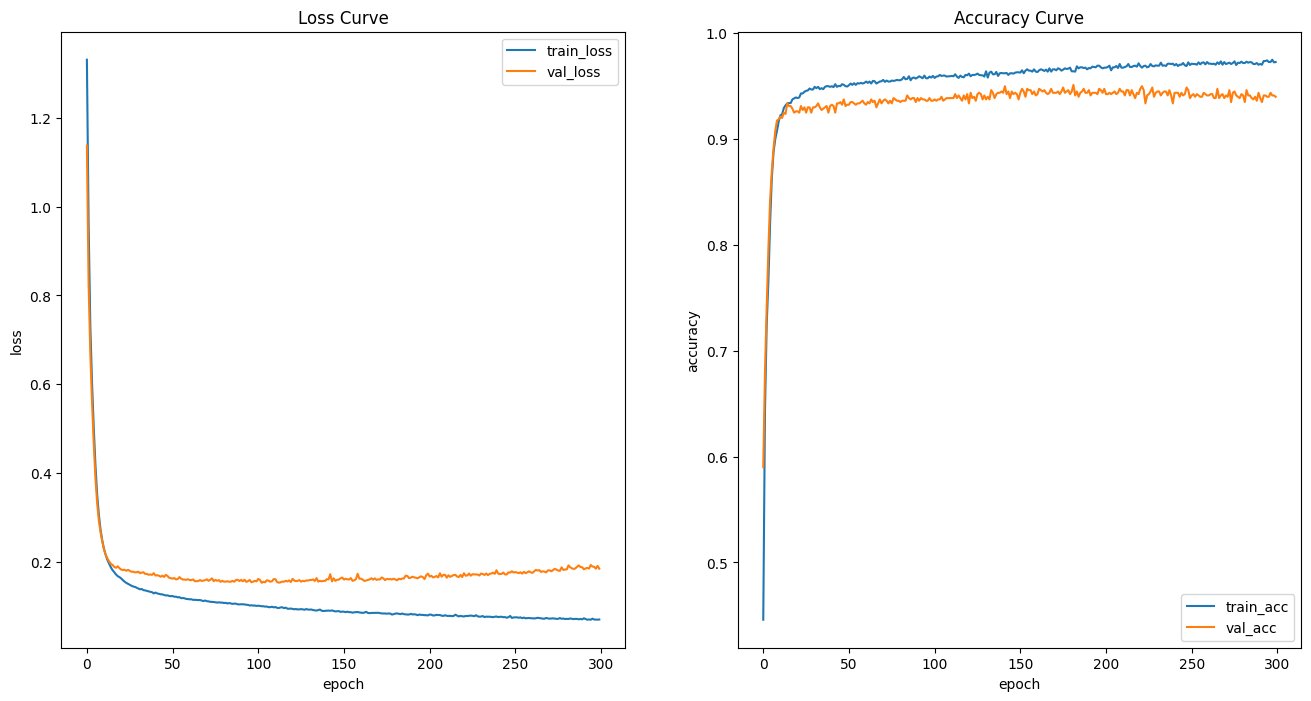

In [27]:
plot_history(hist)

In [28]:
y_pred_e=model.predict(x_test_s)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


In [29]:
y_pred_e

array([[1.8027679e-19, 9.9627644e-01, 1.2721347e-11, 3.7235213e-03],
       [9.9999988e-01, 5.1229814e-28, 6.4899830e-08, 9.1258756e-28],
       [2.7784548e-04, 5.2310015e-15, 9.9972218e-01, 2.6852792e-10],
       ...,
       [1.3272178e-13, 8.4400619e-04, 3.4522173e-01, 6.5393424e-01],
       [5.1612098e-10, 1.3891705e-11, 9.9999988e-01, 1.4642121e-07],
       [8.6983448e-17, 2.2043663e-03, 3.6860906e-06, 9.9779201e-01]],
      dtype=float32)

In [31]:
y_pred_a=np.argmax(y_pred_e,axis=1)

In [35]:
y_pred_a

array([1, 0, 2, 1, 0, 1, 0, 0, 0, 2, 3, 0, 1, 0, 2, 0, 0, 0, 2, 3, 0, 0,
       3, 2, 0, 3, 0, 0, 2, 2, 0, 3, 3, 2, 2, 2, 2, 2, 2, 0, 3, 2, 1, 0,
       0, 3, 2, 3, 0, 0, 2, 0, 0, 0, 0, 2, 1, 2, 3, 0, 0, 0, 0, 2, 0, 1,
       3, 0, 2, 2, 0, 0, 3, 0, 0, 2, 2, 2, 0, 0, 0, 3, 3, 0, 2, 2, 1, 2,
       2, 1, 2, 0, 0, 3, 3, 3, 2, 0, 3, 0, 1, 2, 3, 2, 1, 0, 0, 0, 2, 0,
       2, 2, 2, 0, 2, 3, 1, 0, 0, 0, 2, 2, 2, 2, 3, 0, 2, 2, 0, 0, 2, 0,
       3, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 1, 0, 2, 2, 3, 3, 2, 0,
       0, 3, 2, 2, 2, 2, 1, 0, 2, 1, 3, 2, 0, 0, 0, 0, 2, 3, 0, 1, 0, 0,
       0, 2, 0, 3, 3, 0, 2, 0, 0, 3, 0, 0, 0, 0, 1, 1, 2, 1, 2, 2, 1, 3,
       3, 3, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 3, 2, 2, 2, 2, 3, 0, 1,
       0, 2, 0, 2, 0, 2, 1, 1, 2, 0, 0, 0, 0, 0, 0, 3, 0, 3, 3, 2, 2, 0,
       2, 1, 0, 2, 0, 0, 0, 0, 2, 2, 0, 1, 3, 3, 0, 0, 1, 3, 0, 2, 0, 1,
       0, 2, 3, 3, 2, 0, 2, 2, 2, 0, 1, 1, 2, 0, 3, 0, 1, 0, 0, 3, 2, 0,
       3, 2, 0, 2, 2, 1, 0, 0, 2, 2, 2, 2, 2, 0, 2,

In [42]:
y_test_e

array([1, 0, 2, 1, 0, 1, 0, 0, 0, 2, 2, 0, 3, 0, 2, 0, 0, 0, 2, 3, 0, 0,
       3, 2, 0, 3, 0, 0, 2, 2, 0, 3, 3, 2, 2, 2, 2, 2, 2, 0, 3, 2, 1, 0,
       0, 2, 2, 3, 0, 0, 2, 0, 0, 0, 0, 2, 1, 2, 3, 0, 0, 0, 0, 2, 0, 1,
       3, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 3, 3, 0, 2, 2, 1, 2,
       2, 3, 2, 0, 0, 3, 3, 2, 2, 0, 3, 0, 1, 2, 3, 2, 1, 0, 0, 0, 2, 0,
       2, 2, 2, 0, 2, 3, 1, 0, 0, 0, 2, 3, 3, 2, 3, 0, 2, 2, 0, 0, 2, 0,
       3, 0, 2, 2, 0, 0, 2, 0, 0, 3, 0, 0, 2, 2, 1, 0, 2, 2, 3, 3, 3, 0,
       0, 3, 2, 2, 2, 2, 1, 0, 2, 1, 3, 3, 0, 0, 0, 0, 2, 3, 0, 1, 0, 0,
       0, 2, 0, 3, 3, 0, 2, 0, 0, 3, 0, 0, 0, 0, 1, 1, 2, 1, 2, 2, 1, 1,
       3, 3, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 3, 2, 2, 2, 2, 3, 0, 1,
       0, 2, 0, 2, 0, 2, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 3, 3, 2, 2, 0,
       2, 1, 0, 2, 0, 0, 0, 0, 2, 2, 0, 1, 3, 3, 0, 0, 1, 3, 0, 2, 0, 1,
       0, 2, 3, 3, 2, 0, 2, 2, 2, 0, 1, 1, 2, 0, 3, 0, 1, 0, 0, 3, 2, 0,
       3, 2, 0, 2, 2, 1, 0, 0, 2, 2, 2, 2, 2, 0, 2,

In [43]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

def print_metrics(y_true,y_pred):
  acc=accuracy_score(y_true,y_pred)
  re=recall_score(y_true,y_pred,average='macro')
  pre=precision_score(y_true,y_pred,average='macro')
  f1=f1_score(y_true,y_pred,average='macro')

  print("acc:",acc)
  print("re:",re)
  print("pre:",pre)
  print("f1:",f1)
  cfm=confusion_matrix(y_true,y_pred)
  s=sns.heatmap(cfm,annot=True,fmt='d',cbar=False,cmap='Blues')
  s.set(xlabel='Prediction',ylabel='Actual')
  plt.show()


acc: 0.95
re: 0.9279019803213352
pre: 0.9289703538096215
f1: 0.9283904417055604


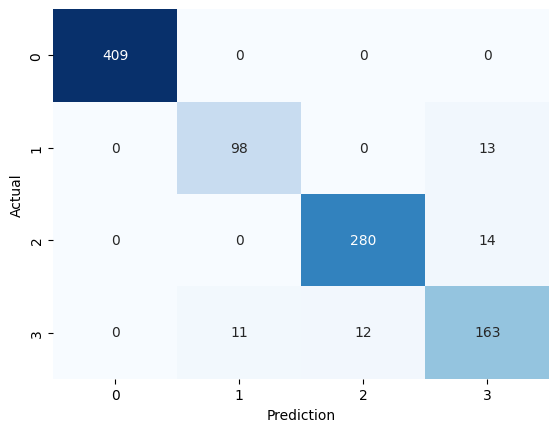

In [44]:
print_metrics(y_test_e,y_pred_a)